In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import seaborn as sns
sns.set()

In [2]:
root_results = "results005/"

In [3]:
results_files = []

for file in glob.glob(root_results + "*.csv"):
    results_files.append(file)
print(f"No. of files: {len(results_files)}")

No. of files: 56


In [4]:
performance_df = pd.DataFrame(columns=['dataset', 'model', 
                                        'N_acc', 'N_c', 'N_p', 'N_nov',
                                        'C_acc', 'C_c', 'C_p', 'C_nov', 
                                        'P_acc', 'P_c', 'P_p', 'P_nov', 
                                        'CP_acc', 'CP_c', 'CP_p', 'CP_nov'])

In [5]:
# def max_ndcg_finder(dataset, type):
#     max_ndcg_act, max_ndcg_inact, max_madr = 0, 0, 0
#     for eachline in group_results_df.get_group(dataset).itertuples(index=True):
#         if eachline.Model in ['PF', 'WMF', 'NeuMF', 'VAECF']:
#             if eachline.Dataset == dataset and eachline.Type == type:
#                 if max_ndcg_act < eachline.ndcg_ACT:
#                     max_ndcg_act = eachline.ndcg_ACT
#                 if max_ndcg_inact < eachline.ndcg_INACT:
#                     max_ndcg_inact = eachline.ndcg_INACT
#                 if max_madr < (eachline.ndcg_ACT - eachline.ndcg_INACT):
#                     max_madr = eachline.ndcg_ACT - eachline.ndcg_INACT
#     return  max(max_ndcg_act, max_ndcg_inact, max_madr)

In [6]:
def summarizer(df_result):
    global performance_df
    
    max_ndcg_all = group_df.get_group('Gowalla')['NDCG_All'].max()
    max_ndcg_act = group_df.get_group('Gowalla')['NDCG_Act'].max()
    max_ndcg_inact = group_df.get_group('Gowalla')['NDCG_Inact'].max()

    for eachline in df_result.itertuples(index=True):

        dataset = eachline.Dataset
        model = eachline.Model
        ndcg_act = eachline.ndcg_ACT / max_ndcg_act
        ndcg_inact = eachline.ndcg_INACT / max_ndcg_inact

        if eachline.Type == 'N':
            raw_acc = eachline.ndcg_ALL / max_ndcg_all
            raw_c = ndcg_act - ndcg_inact
            raw_p = abs(eachline.Long_Items - eachline.Short_Items) / (eachline.Long_Items + eachline.Short_Items)
            raw_nov = eachline.Nov_ALL
        elif eachline.Type == 'C' and eachline.User_EPS == '0.0500000':
            c_acc = eachline.ndcg_ALL / max_ndcg_all
            c_c = ndcg_act - ndcg_inact
            c_p = abs(eachline.Long_Items - eachline.Short_Items) / (eachline.Long_Items + eachline.Short_Items)
            c_nov = eachline.Nov_ALL
        elif eachline.Type == 'P' and eachline.Item_EPS == '0.0500000':
            p_acc = eachline.ndcg_ALL /max_ndcg_all
            p_c = ndcg_act - ndcg_inact
            p_p = abs(eachline.Long_Items - eachline.Short_Items) / (eachline.Long_Items + eachline.Short_Items)
            p_nov = eachline.Nov_ALL
        elif eachline.Type == 'CP' and eachline.User_EPS == '0.0500000' and eachline.Item_EPS == '0.0500000':
            cp_acc = eachline.ndcg_ALL /max_ndcg_all
            cp_c = ndcg_act - ndcg_inact
            cp_p = abs(eachline.Long_Items - eachline.Short_Items) / (eachline.Long_Items + eachline.Short_Items)
            cp_nov = eachline.Nov_ALL

    performance_df = performance_df.append({'dataset': dataset, 'model': model, 
                                        'N_acc': raw_acc, 'N_c': raw_c, 'N_p': raw_p, 'N_nov': raw_nov,
                                        'C_acc': c_acc, 'C_c': c_c, 'C_p': c_p, 'C_nov': c_nov, 
                                        'P_acc': p_acc, 'P_c': p_c, 'P_p': p_p, 'P_nov': p_nov, 
                                        'CP_acc': cp_acc, 'CP_c': cp_c, 'CP_p': cp_p, 'CP_nov': cp_nov}, 
                                        ignore_index=True)

In [7]:
all_dfs = []

for result_file in results_files:
    result_df = pd.read_csv(result_file, sep=",")
    # summarizer(df_result=result_df)
    all_dfs.append(result_df)

# concat all of the dataframes
results_df = pd.concat(all_dfs)

In [8]:
def get_cleaned_data():
    global target_df
    # remove ItemKNN and UserKNN amethod and Random and MostPop
    for eachline in results_df.itertuples(index=True):
        if eachline.Model != 'ItemKNN-Cosine' and eachline.Model != 'UserKNN-BM25' and eachline.Model != 'MostPop' and eachline.Model != 'Random':
            if eachline.Type in ['N', 'C', 'P', 'CP'] and eachline.User_EPS in ['-', '0.0500000'] and eachline.Item_EPS in ['-', '0.0500000']:
                target_df = target_df.append({'Dataset': eachline.Dataset, 'Model': eachline.Model, 'Type': eachline.Type, 'NDCG_All': eachline.ndcg_ALL, 'NDCG_Act': eachline.ndcg_ACT, 'NDCG_Inact': eachline.ndcg_INACT, 'Novelty': eachline.Nov_ALL}, ignore_index = True)

In [9]:
target_df = pd.DataFrame(columns=['Dataset', 'Model', 'Type', 'NDCG_All', 'NDCG_Act', 'NDCG_Inact', 'Novelty'])
get_cleaned_data()

In [10]:
group_df = target_df.groupby('Dataset')

In [11]:
# all_dfs = []

for result_file in results_files:
    result_df = pd.read_csv(result_file, sep=",")
    summarizer(df_result=result_df)
    # all_dfs.append(result_df)

# concat all of the dataframes
# results_df = pd.concat(all_dfs)

In [12]:
group_performance_df = performance_df.groupby('dataset')

In [64]:
def radar_chart(dataset='Gowalla', type='N'):
    categories = ['C-Fainress', 'P-Fairness', 'Accuracy']
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=4)

    performance_list = []

    plt.figure(figsize=(8, 8))
    plt.subplot(111, polar=True)
    plt.tick_params(pad=23)

    for eachline in group_performance_df.get_group(dataset).iterrows():
        if eachline[1][1] in ['PF', 'WMF', 'NeuMF', 'VAECF']:
            if type == 'N':
                performance_list = [1 - eachline[1][3], 1 - eachline[1][4], eachline[1][2], 1 - eachline[1][3]]
            if type == 'C':
                # c, p, a = C
                performance_list = [1 - eachline[1][7], 1 - eachline[1][8], eachline[1][6], 1 - eachline[1][7]]
            if type == 'P':
                # c, p, a = C
                performance_list = [1 - eachline[1][11], 1 - eachline[1][12], eachline[1][10], 1 - eachline[1][11]]
            if type == 'CP':
                # c, p, a = C
                performance_list = [1 - eachline[1][15], 1 - eachline[1][16], eachline[1][14], 1 - eachline[1][15]]
                
            plt.plot(label_loc, performance_list, label=eachline[1][1], linewidth=2)
            plt.scatter(label_loc, performance_list, s=30, zorder=10)

    # plt.title('Model comparison', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories, fontsize=16)
    # plt.set_thetagrids(frac=1.3)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.savefig(f"Intro_{dataset}_{type}.pdf")

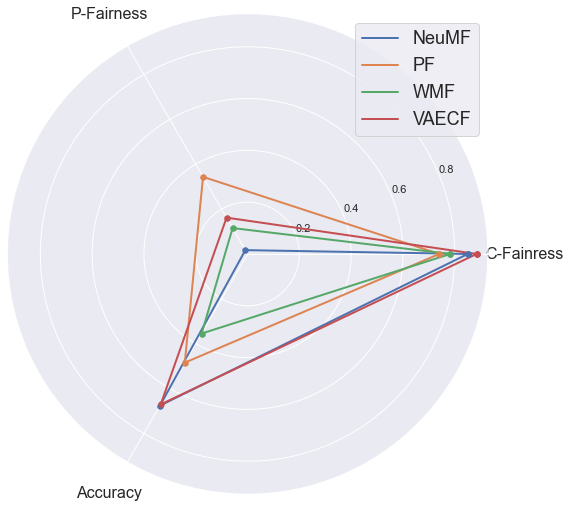

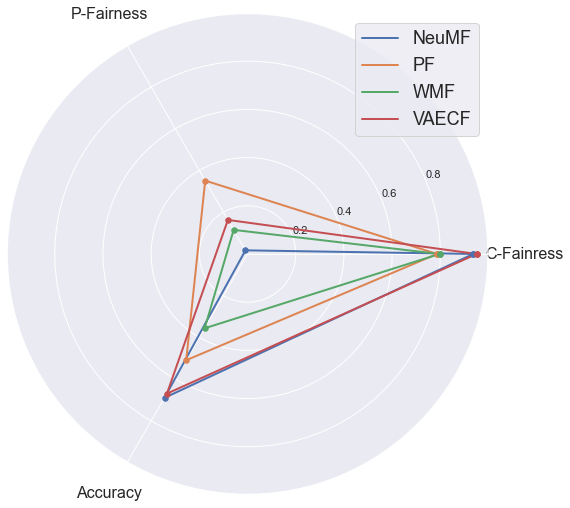

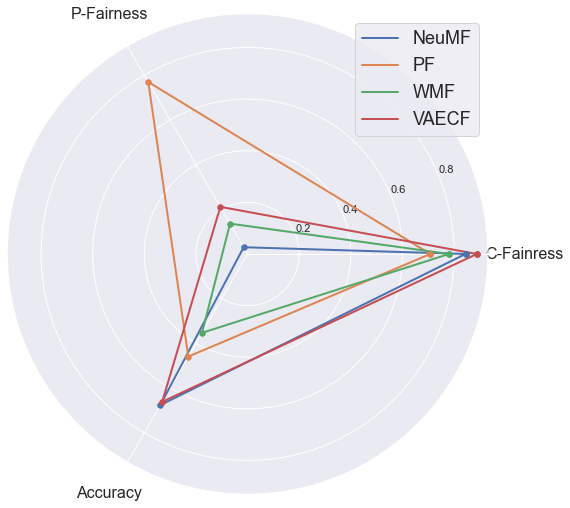

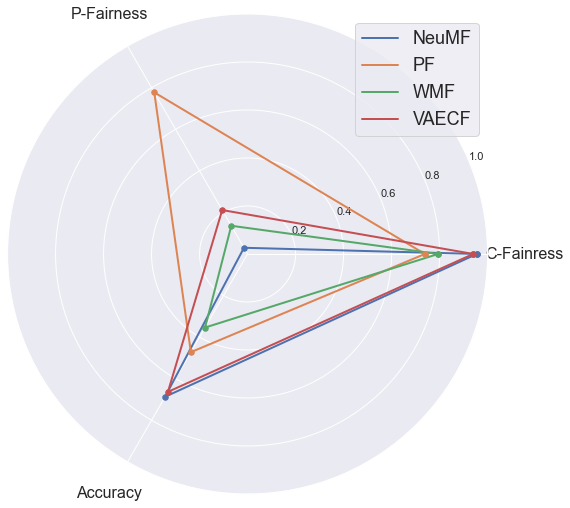

In [68]:
for type in ['N', 'C', 'P', 'CP']:
    dataset = 'Epinion'
    radar_chart(dataset=dataset, type=type)